# Movies-ETL(Extract, Transform, Load)

In [1]:
import json
import pandas as pd
import numpy as np

import re

## Extract

In [2]:
pwd

'C:\\Users\\tony5\\Movies-ETL'

In [3]:
file_dir = 'C:\\Users\\tony5\\Movies-ETL' + "\\Resources\\"

In [4]:
with open(f'{file_dir}wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

#### Basic Files Inspections

In [5]:
len(wiki_movies_raw)

7311

In [6]:
# First 2 records
wiki_movies_raw[0:2]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [7]:
# Last 2 records
wiki_movies_raw[-2:]

[{'url': 'https://en.wikipedia.org/wiki/Destroyer_(2018_film)',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt7137380/',
  'title': 'Destroyer',
  'Directed by': 'Karyn Kusama',
  'Produced by': ['Fred Berger', 'Phil Hay', 'Matt Manfredi'],
  'Written by': ['Phil Hay', 'Matt Manfredi'],
  'Starring': ['Nicole Kidman',
   'Sebastian Stan',
   'Toby Kebbell',
   'Tatiana Maslany',
   'Bradley Whitford',
   'Jade Pettyjohn',
   'Scoot McNairy'],
  'Music by': 'Theodore Shapiro',
  'Cinematography': 'Julie Kirkwood',
  'Edited by': 'Plummy Tucker',
  'Productioncompany ': ['30West',
   'Automatik Entertainment',
   'Annapurna Pictures'],
  'Distributed by': 'Mirror Releasing',
  'Release date': ['August 31, 2018',
   '(',
   '2018-08-31',
   ')',
   '(',
   'Telluride',
   ')',
   'December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '123 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$9 million',
  'Box

In [8]:
# Some records in the middle
wiki_movies_raw[3600:3602]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

## Extract Kaggle Movie(TMDb) Data

In [9]:
kaggle_metadata = pd.read_csv(f'{file_dir}movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}ratings.csv')

#### Basic Files Inspections

In [10]:
kaggle_metadata.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [11]:
kaggle_metadata.tail(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


In [12]:
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435


In [13]:
ratings.tail(2)

,userId,movieId,rating,timestamp
26024287,270896,64957,4.5,1257033990
26024288,270896,71878,2.0,1257031858


In [14]:
ratings.sample(2)

,userId,movieId,rating,timestamp
6568223,67796,8528,3.5,1396148926
12655620,131384,778,4.5,1106304129


## Transform (Inspect, Plan, Execute)

In [15]:
# Convert JSON format to DataFrame
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

In [16]:
wiki_movies_df.head(2)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# wiki_movies_df.columns ## wont print out all the cloumns

list(wiki_movies_df.columns)

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [18]:
# Filter the list of movies that the movies must have dictionary keys
# in ("Director" or "Directed by") and "imdb_link"
# And No TV shows("No. of episodes")
wiki_movies = [movie for movie in wiki_movies_raw
               if ("Director" in movie or "Directed by" in movie)
               and "imdb_link" in movie 
               and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [19]:
# DF have reduced columns because there were columns targeted for rows that do not have values in the filter.
wiki_movies_df = pd.DataFrame(wiki_movies)
wiki_movies_df.sample(2)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
2149,https://en.wikipedia.org/wiki/Brown%27s_Requie...,1998,https://www.imdb.com/title/tt0171135/,Brown's Requiem,Jason Freeland,NaN,NaN,NaN,NaN,"[Michael Rooker, Tobin Bell, Selma Blair, Jack...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4116,https://en.wikipedia.org/wiki/It%27s_a_Boy_Gir...,2006,https://www.imdb.com/title/tt0482527/,It's a Boy Girl Thing,Nick Hurran,"[Steve Hamilton Shaw, David Furnish, Martin F....",NaN,NaN,NaN,"[Kevin Zegers, Samaire Armstrong, Sherry Mille...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# movies have a value for "Arabic", and Different languages actually show alternate names of movie instead of YES/NO
wiki_movies_df[wiki_movies_df["Arabic"].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6834,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7058,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN


In [21]:
wiki_movies[0:1]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [22]:
# Below store all different titles in differnt langauge cloumns into one single "alt_title" column.
# And also reduced columns from 75 into 40

def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy, new local variable
    alt_titles = {}
    
    # combine alternate titles in differnt columns into one column
    different_title_columns = ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']
    # Assign all those titles to one single dict.
    for key in different_title_columns:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    # merge column names that have same meanings
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [23]:
wiki_movies_df = pd.DataFrame(clean_movies)
wiki_movies_df[wiki_movies_df["alt_titles"].notnull()]["alt_titles"]

858            {'Mandarin': 'Xǐyàn', 'Traditional': '喜宴'}
1342       {'Also known as': 'Detonator II: Night Watch'}
1534    {'Mandarin': 'Dōng Gōng Xī Gōng', 'Simplified'...
1888                   {'French': 'Le Cinquième Élément'}
3413    {'Hangul': '원더풀 데이즈', 'Revised Romanization': ...
4238    {'Hangul': '파이 스토리', 'Revised Romanization': '...
4790                  {'Original title': 'ואלס עם באשיר'}
6393    {'Hepburn': 'Omoide no Mānī', 'Japanese': '思い出...
6456    {'Cantonese': ['Jip', '6', 'Man', '6', 'Saam',...
6613    {'Mandarin': 'Cháng Chéng', 'Simplified': '长城'...
6620                                  {'Chinese': '摇滚藏獒'}
6661    {'Simplified': '我们诞生在中国', 'Traditional': '我們誕生...
6719                                  {'Yiddish': 'מנשה'}
6829    {'Hepburn': 'Meari to Majo no Hana', 'Japanese...
6834    {'Arabic': 'قضية رقم ٢٣', 'Literally': 'Case N...
6849     {'Romanized': 'Nelyubov', 'Russian': 'Нелюбовь'}
6862                           {'Hebrew': 'פוֹקְסטְרוֹט'}
7009    {'Hepb

In [24]:
print(wiki_movies_df.shape)
# sorted(wiki_movies_df.columns.tolist())
wiki_movies_df.columns.sort_values()

(7076, 40)


Index(['Animation by', 'Audio format', 'Based on', 'Box office', 'Budget',
       'Cinematography', 'Color process', 'Composer(s)', 'Country',
       'Created by', 'Director', 'Distributor', 'Editor(s)',
       'Executive producer(s)', 'Followed by', 'Genre', 'Label', 'Language',
       'McCune–Reischauer', 'Narrated by', 'Original language(s)',
       'Original network', 'Picture format', 'Preceded by', 'Producer(s)',
       'Production company(s)', 'Production location(s)', 'Recorded',
       'Release date', 'Running time', 'Starring', 'Suggested by', 'Venue',
       'Voices of', 'Writer(s)', 'alt_titles', 'imdb_link', 'title', 'url',
       'year'],
      dtype='object')

### regex, regular expression. God I hate/love? this :(

Extract unique id from imdb_link

In [25]:
# regular expressions in Pandas' built-in string methods (not re python module)

# str.extract(r'(tt\d{7})'), to extrac matching values using regex.
# () for group of text, tt for actual text
# \d for numerical digits
# {7} for last thing(\d here) 7 times.

wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})').head()


,0
0,tt0098987
1,tt0098994
2,tt0099005
3,tt0099012
4,tt0099018


In [26]:
# Create a new column "imdb_id" based on the fact that "imdb_link" contains unique ID.
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
# 7076 * 41
wiki_movies_df.shape

(7076, 41)

Remove duplicate rows based on imdb_id. 7033*41

In [27]:
wiki_movies_df.drop_duplicates("imdb_id", inplace = True)

#7033 * 41
print(wiki_movies_df.shape)

(7033, 41)


Remove columns that have too much null values (Noticed that we remove our alt_titles)

In [28]:
current_dict = dict(wiki_movies_df.isnull().sum())
print(f"Total Rows: {len(wiki_movies_df)}")
current_dict

Total Rows: 7033


{'url': 0,
 'year': 0,
 'imdb_link': 0,
 'title': 1,
 'Based on': 4852,
 'Starring': 184,
 'Narrated by': 6752,
 'Cinematography': 691,
 'Release date': 32,
 'Running time': 139,
 'Country': 236,
 'Language': 244,
 'Budget': 2295,
 'Box office': 1548,
 'Director': 0,
 'Distributor': 357,
 'Editor(s)': 548,
 'Composer(s)': 518,
 'Producer(s)': 202,
 'Production company(s)': 1678,
 'Writer(s)': 199,
 'Genre': 6923,
 'Original language(s)': 6875,
 'Original network': 6908,
 'Executive producer(s)': 6936,
 'Production location(s)': 6986,
 'Picture format': 6969,
 'Audio format': 6972,
 'Voices of': 7031,
 'Followed by': 7024,
 'Created by': 7023,
 'Preceded by': 7023,
 'Suggested by': 7032,
 'alt_titles': 7012,
 'Recorded': 7031,
 'Venue': 7032,
 'Label': 7031,
 'Animation by': 7031,
 'Color process': 7032,
 'McCune–Reischauer': 7031,
 'imdb_id': 0}

In [29]:
# wiki_columns_to_keep = [column for column in wiki_movies_df.columns
#                         if wiki_movies_df[column].isnull().sum()
#                         < len(wiki_movies_df) * 0.9]


wiki_columns_to_keep = [key for key, value in current_dict.items()
                        if value < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]


# 7033 * 21
print(wiki_movies_df.shape)

(7033, 21)


### Parse data types

In [30]:
wiki_movies_df.info()
# wiki_movies_df.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7033 entries, 0 to 7075
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   url                    7033 non-null   object
 1   year                   7033 non-null   int64 
 2   imdb_link              7033 non-null   object
 3   title                  7032 non-null   object
 4   Based on               2181 non-null   object
 5   Starring               6849 non-null   object
 6   Cinematography         6342 non-null   object
 7   Release date           7001 non-null   object
 8   Running time           6894 non-null   object
 9   Country                6797 non-null   object
 10  Language               6789 non-null   object
 11  Budget                 4738 non-null   object
 12  Box office             5485 non-null   object
 13  Director               7033 non-null   object
 14  Distributor            6676 non-null   object
 15  Editor(s)            

In [31]:
# I only use this here so i wont get too many columns from the beginning
pd.set_option('max_columns', None)
wiki_movies_df.head(1)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,Language,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,English,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987


In [32]:
# not inplace, 7033 > 5485 
box_office = wiki_movies_df['Box office'].dropna()
box_office_count = box_office.shape[0]
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [33]:
# We somehow have list in our values, so we cant use regex.

# def is_not_a_string(x):
#     return type(x) != str
# box_office[box_office.map(is_not_a_string)]


# map and apply both work here, however, they have different usage.
box_office[box_office.apply(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [34]:
# If value is list, convert it to string. If not, leave it as is.
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

## Deeper into REGEX

* \d will match any digit from 0 to 9.
* \D will match any non-digit character.
* \w matches a word character (a letter, digit, or underscore).
* \W matches any non-word character (anything other than a letter, digit, or underscore, such as spaces and punctuation).
* \s will match any whitespace character (including spaces, tabs, and newlines).
* \S will match any non-whitespace characters.


[ceh]at" would match '"cat", "eat", "hat", and "that", but not "rat.
* "[a-z]" matches any lowercase letter.

* "[A-Z]" matches any uppercase character.
* "[0-9]" matches any digit.

* "[a-zA-Z]" matches any lowercase or uppercase letter.
* "[a-zA-Z0-9]" matches any alphanumeric character.

* "[A-E]"would match "A", "B", "C", "D", or "E".
* "[1-3]" would match the digits "1", "2", or "3".

*  Inside of a character set, we can specify a character that we do NOT want to include by prefacing it with a caret: ^

* {#}	Matches a specific number of times
* {#,}	Matches at least a specific number of times
* {#,#}	Matches within a specific range of times


* dot (.), is a wildcard in regular expressions, which means it will match any single character whether it is a digit, a letter, whitespace, or punctuation. The only thing that a dot won't match is a line break
    regular expression "ca.," the dot will match any character, so "cat", "car", "cab", "ca!", "ca?", and "ca." would all be matches.
* Escaping: \ , escape character. It says that the next character gets to escape its duties as a special character in the regular expression and act like a plain old literal character.
    "ca\\." will only match "ca.". Strings such as "cat", "car", and "cab", and the others from above won't be matched.
    

Counting Characters
* \* , ca*t" would match "cat" and "caaat" but also "fiction.
* \+ , ca+t" would match "cat" and "caaat" but not "fiction."
* \? , The question mark is for optional characters, which means they can show up zero or one time. So, "ca?t" is equivalent to the regular expression pattern "ca{0,1}t"."

Alternation
* pipe: |. This essentially functions as a logical OR. For example, if we wanted to match "cat" or "mouse" or "dog," we would make a string "cat|mouse|dog."

String Boundaries
* we use the caret (\\^) to represent the beginning of the string, and the dollar sign (\\\\$) to represent the end of the string. So, "\^cat" would match "cat" and "catatonic," but not "concatenate." "cat\\\\$" would also match "cat" and "tomcat," but not "catatonic."

Capture Groups: ( )
* "1,000", "1,000,000", and "1,000,000,000" as strings all have a similar structure. There is a comma followed by three zeros that repeats as a group. We can match all of these with one regular expression, using parentheses to create a capture group. One regular expression that matches all three strings would be "1(,000)+."
* "\d{3}-\d{3}-\d{4}" would match any phone number in the form "333-333-4444," but if you wanted to extract only the digits, you would use "(\d{3})-(\d{3})-(\d{4})", and only the digits would be captured. Specifically, the digits of the phone number would be captured into three groups: area code, prefix, and line number.

Non-Capturing Groups and Negative Lookahead Groups: (?: ), (?! )

* The regular expression "(?:\d{3})-(\d{3})-(?:\d{4})" will match numbers of the form "123-456-7890," but it will only capture the middle group456, the prefix.

*  a negative lookahead group would be "(?!\d)". Our new regular expression is "(\d{3})-(\d{3})-(\d{4})(?!\d)":
"333-333-4444" will match.
"333-333-55555" will not.

Here are two main forms the box office data is written in: "\\$123.4 million" (or billion), and "$123,456,789."

1. Start with a dollar sign.
2. Add an arbitrary (but non-zero) number of digits.
3. Add an optional decimal point.
4. Add an arbitrary (but possibly zero) number of more digits.
5. Add a space (maybe more than one).
6. Add the word "million" or "billion."

In [35]:
# "$123.4 million" (or billion)
form_one = r'\$\d+\.?\d*\s*[mb]illion'

# in case we have uppercase letters, 3896
form_one_count = box_office.str.contains(form_one, flags=re.IGNORECASE).sum()
print(form_one_count)

3896


1. A dollar sign
2. A group of one to three digits
3. At least one group starting with a comma and followed by exactly three digits

In [36]:
# "$123,456,789."
form_two = r"\$\d{1,3}(?:,\d{3})+"

# The ?: The use of a non-capturing group isn’t strictly necessary here,
# but it eliminates an unwanted warning message in Jupyter Notebook.
form_two_count = box_office.str.contains(form_two, flags=re.IGNORECASE).sum()
print(form_two_count)

1544


In [37]:
# 5485 - 3896 - 1544 = 45
# box_office_count - form_one_count - form_two_count

# print(box_office_count, form_one_count, form_two_count)

Pandas has its own element-wise logical operators:

The element-wise negation operator is the tilde: ~ (similar to "not")
The element-wise logical "and" is the ampersand: &
The element-wise logical "or" is the pipe: |

The use of "and", "or", "not" will cause error....

"Logical Operators in Pandas are &, | and ~, and parentheses (...) is important!
Python's and, or and not logical operators are designed to work with scalars. So Pandas had to do one better and override the bitwise operators to achieve vectorized (element-wise) version of this functionality." by cs95

In [38]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)

box_office_useless = box_office[(~matches_form_one) & (~matches_form_two)]
box_office_useless

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [39]:
# 1. Some values have spaces in between the dollar sign and the number.
#     form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
#     form_two = r'\$\s*\d{1,3}(?:,\d{3})+'

# 2. Some values use a period as a thousands separator, not a comma.
#     form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+'
#     The results will also match values like 1.234 billion,
#     form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

# 3. Some values are given as a range.
#     box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

# 4. "Million" is sometimes misspelled as "millon."
#     form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

In [40]:
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

In [41]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [42]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})',flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [43]:
wiki_movies_df.head(1)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,Language,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,English,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,21400000.0


In [44]:
# "Box office" is now updated to "box_office", so we can remove it.
wiki_movies_df.drop('Box office', axis=1, inplace=True)

### Parse Budget Data

In [45]:
# 7033 > 4738
budget = wiki_movies_df["Budget"].dropna()
budget

0        $20 million
1         $6 million
2        $35 million
3        $12 million
4        $25 million
            ...     
7070    €4.3 million
7071     $42 million
7072     $60 million
7073     $20 million
7074      $9 million
Name: Budget, Length: 4738, dtype: object

In [46]:
# convert values that are list to string:
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

# remove any values between a dollar sign and a hyphen (for budgets given in ranges):
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [47]:
budget.sample(10)

3563     $50 million
3751    $100 million
4797      $7,500,000
5171     $24 million
702         $125,000
7058      $4 million
6955    $125 million
870      $20 million
80       $12 million
3132      $5 million
Name: Budget, dtype: object

In [48]:
# should be 38 left
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)
budget = budget.str.replace(r'\[\d+\]\s*', '')
len(budget[~matches_form_one & ~matches_form_two])

38

In [49]:
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [50]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df.drop('Budget', axis=1, inplace=True)

### Parse Release Date

In [51]:
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [52]:
release_date

0                            July 11, 1990 ( 1990-07-11 )
1       May 17, 1990 ( 1990-05-17 ) (Cannes Film Marke...
2                          August 10, 1990 ( 1990-08-10 )
3                        December 25, 1990 ( 1990-12-25 )
4                                       December 19, 1990
                              ...                        
7071     December 25, 2018 ( 2018-12-25 ) (United States)
7072    December 11, 2018 ( 2018-12-11 ) ( Samuel Gold...
7073    November 8, 2018 ( 2018-11-08 ) ( AFI Fest ) D...
7074    August 31, 2018 ( 2018-08-31 ) ( Telluride ) D...
7075                      28 December 2018 ( 2018-12-28 )
Name: Release date, Length: 7001, dtype: object

In [53]:
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE).sample(10)

,0
2261,1998
1758,"May 13, 1996"
6870,2018
4943,"March 27, 2009"
2684,"March 10, 2000"
6292,"November 16, 2012"
3226,2003
1409,1995
1207,"April 21, 1995"
3321,"April 11, 2003"


In [54]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

### Parse Running Time

In [55]:
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
print(f"Running time with values: {len(running_time)}")

running_time.sample(10)

Running time with values: 6894


886      99 minutes
1729     94 minutes
6739     97 minutes
2055     97 minutes
2100     91 minutes
2058    100 minutes
2863    108 minutes
6496    106 minutes
2277     91 minutes
2348    108 minutes
Name: Running time, dtype: object

In [56]:
# running_time with aboved most common format, 6528.
# So we gave 366 entries in differnt format
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE).sum()

6528

In [57]:
# Abnormal formats
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [58]:
# cepting other abbreviations of "minutes" by only searching up to the letter "m."
# This actually contains alot of error, but we seems to ignore it for now
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE).sum()

6877

In [59]:
# The remaining 17 follow:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [60]:
# We can match all of the hour + minute patterns with one regular expression pattern. Our pattern follows:

# Start with one or more digits.
# Have an optional space after the digit and before the letter "h."
# Capture all the possible abbreviations of "hour(s)." To do this, we'll make every letter in "hours" optional except the "h."
# Have an optional space after the "hours" marker.
# Have an optional number of digits for minutes.

In [61]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [62]:
# Coercing the errors will turn the empty strings into Not a Number (NaN).
# We can use fillna() to change all the NaNs to zeros.
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)
wiki_movies_df.drop('Running time', axis=1, inplace=True)

### Clean the Kaggle Data

In [63]:
kaggle_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [64]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

### Remove Bad Data

In [65]:
# 3 Rows that have bad data in "adult", which suppose to be either True or False
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# We decided to drop all columns that are not adult == False,
# and so we can drop the adult column as well.
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [67]:
print(kaggle_metadata['video'].value_counts())

False    45358
True        93
Name: video, dtype: int64


In [71]:
# Convert object type to boolean, I think as type is a better solution that whats suggested.
# kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'
kaggle_metadata['video'] = kaggle_metadata['video'].astype("bool")

In [72]:
kaggle_metadata['video']

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [79]:
# errors= argument is set to 'raise',
# so we'll know if there's any data that can't be converted to numbers.

# pd.to_numeric is overall better when convert from non-numeric type with its arguments.
#　astype(int8|16|32|64,float64,boolean) is better for numeric to numeric

kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [84]:
# kaggle_metadata['release_date'].astype("datetime64[ns]")
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
           ...    
45461          NaT
45462   2011-11-17
45463   2003-08-01
45464   1917-10-21
45465   2017-06-09
Name: release_date, Length: 45454, dtype: datetime64[ns]

# Reasonability Checks on Ratings Data

In [86]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [96]:
# the ratings dataset has so many rows,
# we need to set the null_counts option to True
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [97]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


The Unix time standard stores points of time as integers, specifically as the number of seconds that have elapsed since midnight of January 1, 1970. This is known as the **Unix epoch**. There are other epochs in use, but the Unix epoch is by far the most widespread.

From the MovieLens documentation, the timestamp is the number of seconds since midnight of January 1, 1970.



In [99]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['timestamp'].head()

0   2015-03-09 22:52:09
1   2015-03-09 23:07:15
2   2015-03-09 22:52:03
3   2015-03-09 22:52:26
4   2015-03-09 22:52:36
Name: timestamp, dtype: datetime64[ns]

In [100]:
ratings['rating'].describe()

count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

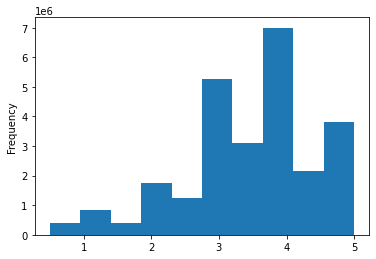

In [101]:
# Data looks fine
# This display option is much better in this case.

pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()